In [1]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import HasseVizNx

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1, 1, 1, 1)
plt.rcParams['savefig.dpi'] = 300

In [3]:
!wget -q https://raw.githubusercontent.com/EgorDudyrev/FCApy/main/data/liveinwater.cxt
K = FormalContext.read_cxt('liveinwater.cxt')
!rm liveinwater.cxt

In [4]:
L = ConceptLattice.from_context(K)
len(L)

19

Let us draw the first draft of a lattice

In [5]:
viz = HasseVizNx()

Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(11, 14): frozenset({9})}


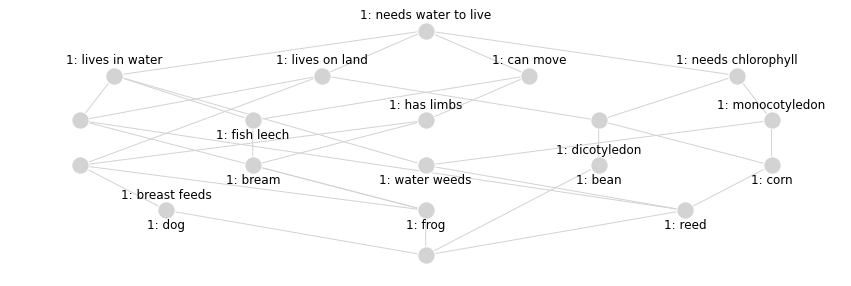

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

viz.draw_concept_lattice(L, ax=ax,)
plt.show()

# Fix the positioning

As the warning says, some edges overlap the nodes. Specifically, edge `(11, 14)` overlaps the node `9`.

In order to find the erroneous place we
1. Toogle on `flg_node_indices` parameter to show node indices
2. Highlight edge `(11, 14)` with 'green' colour
3. Highlight node `9` with 'pink' colour

Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(11, 14): frozenset({9})}


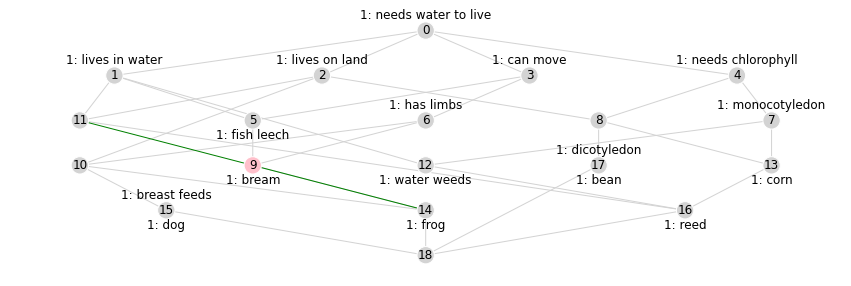

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

viz.draw_concept_lattice(
    L, ax=ax,
    flg_node_indices=True,
    edge_color=['green' if e==(11, 14) else viz.edge_color for e in  L.to_networkx().edges()],
    node_color=['pink' if v == 9 else viz.node_color for v in L.to_networkx().nodes()],
)
plt.show()

Let us move node `14` to the left under node `9` to fix the error.

In [8]:
dx = viz.mover.pos[9][0] - viz.mover.pos[14][0]
viz.mover.jitter_node(14, dx)

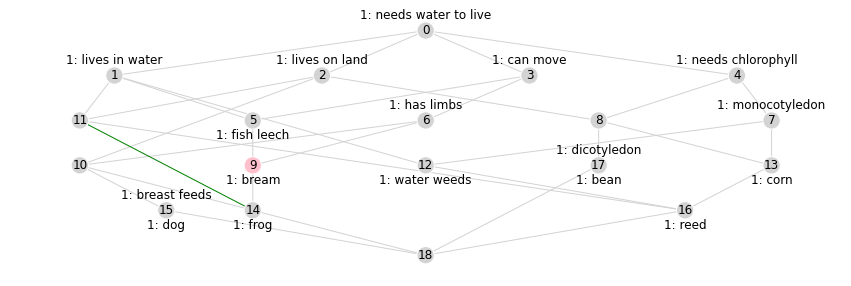

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

viz.draw_concept_lattice(
    L, ax=ax,
    flg_node_indices=True,
    edge_color=['green' if e==(11, 14) else viz.edge_color for e in  L.to_networkx().edges()],
    node_color=['pink' if v == 9 else viz.node_color for v in L.to_networkx().nodes()],
)
plt.show()

Success!

Now no edges overlap the nodes. But the lattice still does not look pretty. Let us solve this problem.

And also fix the current positioning for the future.

In [10]:
pos_fix = viz.mover.pos

# Enhance prettiness

In [11]:
viz.mover.pos = pos_fix

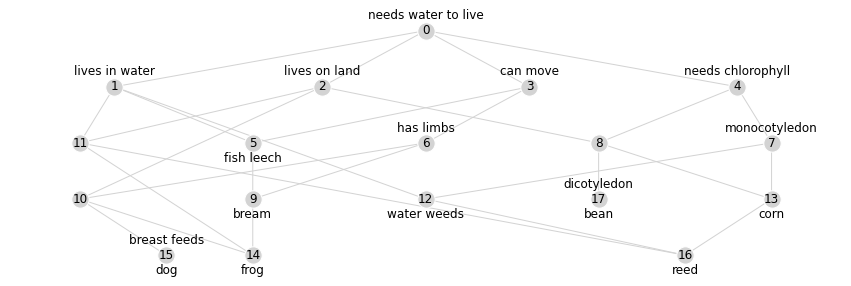

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

viz.draw_concept_lattice(
    L, ax=ax,
    flg_node_indices=True,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=[i for i in range(len(L)) if i != L.bottom_concept_i]
)
plt.show()

In [13]:
viz.mover.pos = pos_fix

viz.mover.swap_nodes(1, 3)
viz.mover.swap_nodes(11, 6)
viz.mover.jitter_node(15, viz.mover.pos[10][0]-viz.mover.pos[15][0])

viz.mover.swap_nodes(1, 2)
viz.mover.swap_nodes(9, 10)

dx = (viz.mover.pos[11][0] - viz.mover.pos[14][0])/2
viz.mover.jitter_node(14, dx)
viz.mover.jitter_node(15, dx)

viz.mover.swap_nodes(8, 7)
viz.mover.swap_nodes(13, 17)
viz.mover.jitter_node(16, viz.mover.pos[2][0]-viz.mover.pos[16][0])

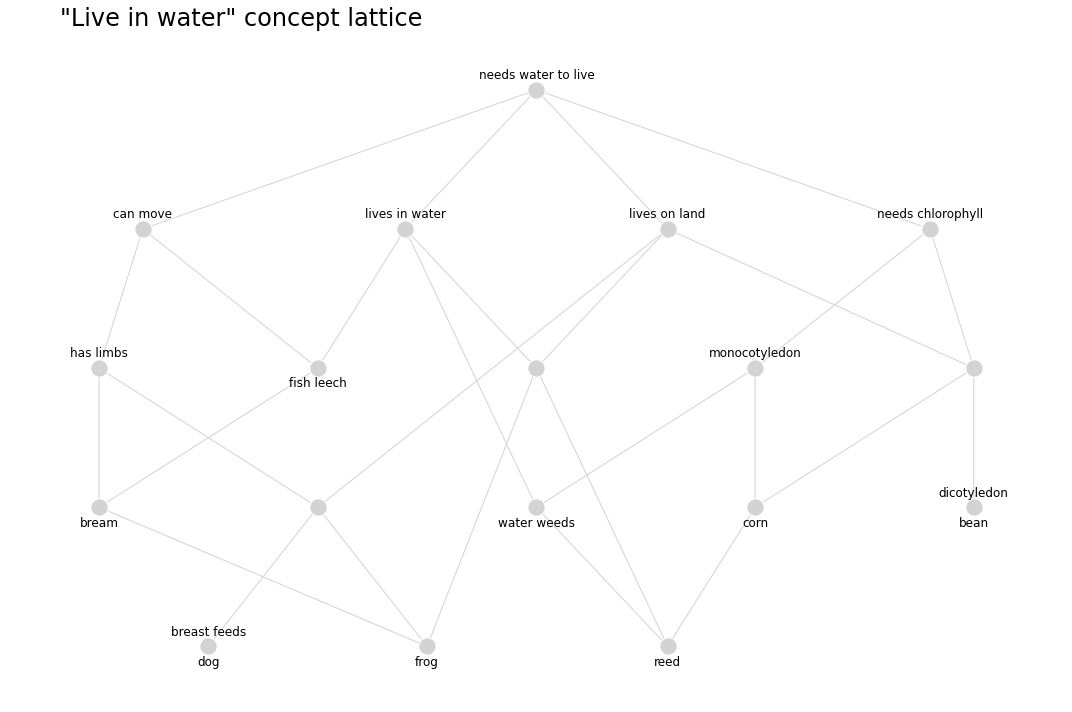

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

viz.draw_concept_lattice(
    L, ax=ax,
    flg_node_indices=False,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=[i for i in range(len(L)) if i != L.bottom_concept_i]
)
plt.title('"Live in water" concept lattice', size=24, ha='left', x=0.05)

plt.tight_layout()
plt.savefig('imgs/live in water concept lattice.png')
plt.show()

In [15]:
import networkx as nx

In [16]:
plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [17]:
viz.node_label_font_size = 14

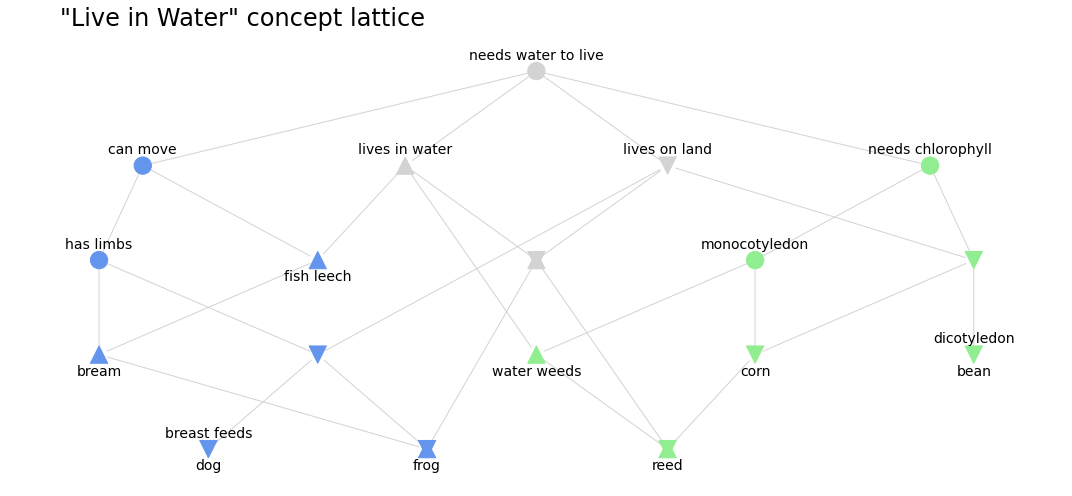

In [18]:
fig, ax = plt.subplots(figsize=(15,7))

viz.draw_concept_lattice(
    L, ax=ax,
    flg_node_indices=False,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=[i for i in range(len(L)) if i != L.bottom_concept_i],
    #node_color=['lightgreen' if 'needs chlorophyll' in c.intent else viz.node_color for c in L if c != L.bottom_concept],
    node_alpha=0
)

node_color = ['lightgreen' if 'needs chlorophyll' in c.intent else 'cornflowerblue' if 'can move' in c.intent else 'lightgray' for c in L]
              #viz.node_color 

nodes_in_water = [c_i for c_i, c in enumerate(L) if 'lives in water' in c.intent and 'lives on land' not in c.intent ]
nx.draw_networkx_nodes(L.to_networkx(), viz.mover.pos, node_shape='^', nodelist=nodes_in_water, node_color=[node_color[c_i] for c_i in nodes_in_water])
nodes_on_land = [c_i for c_i, c in enumerate(L) if 'lives in water' not in c.intent and 'lives on land' in c.intent]
nx.draw_networkx_nodes(L.to_networkx(), viz.mover.pos, node_shape='v', nodelist=nodes_on_land, node_color=[node_color[c_i] for c_i in nodes_on_land])
nodes_duo = [c_i for c_i, c in enumerate(L) if 'lives in water' in c.intent and 'lives on land' in c.intent and c_i not in nodes_in_water+nodes_on_land and c_i != L.bottom_concept_i]
nx.draw_networkx_nodes(L.to_networkx(), viz.mover.pos, node_shape='^', nodelist=nodes_duo, node_color=[node_color[c_i] for c_i in nodes_duo])
nx.draw_networkx_nodes(L.to_networkx(), viz.mover.pos, node_shape='v', nodelist=nodes_duo, node_color=[node_color[c_i] for c_i in nodes_duo])

nodes_other = [c_i for c_i in range(len(L)) if c_i not in nodes_in_water and c_i not in nodes_on_land and c_i not in nodes_duo and c_i != L.bottom_concept_i]
nx.draw_networkx_nodes(L.to_networkx(), viz.mover.pos, node_shape='o', nodelist=nodes_other, node_color=[node_color[c_i] for c_i in nodes_other])

plt.title('"Live in Water" concept lattice', size=24, ha='left', x=0.05)
plt.tight_layout()
plt.savefig('imgs/live_in_water_lattice_fullcolored.png')
plt.show()

# Drop "lives" as nodes. Add "lives" as colours

In [19]:
from copy import deepcopy

In [20]:
L_nolives = deepcopy(L)
for c in L:
    if c.intent in {
        ('needs water to live', 'lives in water'),
        ('needs water to live', 'lives on land'),
        ('needs water to live', 'lives in water', 'lives on land')
    }:
        L_nolives.remove(c)
len(L), len(L_nolives)

(19, 16)

In [21]:
viz.mover.initialize_pos(L_nolives)
viz.mover.jitter_node(1, (viz.mover.pos[3][0]+viz.mover.pos[4][0])/2 - viz.mover.pos[1][0])
for c_i in [7, 11]:
    viz.mover.jitter_node(c_i, viz.mover.pos[3][0] - viz.mover.pos[c_i][0])
for c_i in [8, 12]:
    viz.mover.jitter_node(c_i, viz.mover.pos[4][0] - viz.mover.pos[c_i][0])
for c_i in [9, 10, 14]:
    viz.mover.jitter_node(c_i, viz.mover.pos[0][0] - viz.mover.pos[8][0])
for c_i in [2, 10]:
    viz.mover.jitter_node(c_i, (viz.mover.pos[5][0]+viz.mover.pos[6][0])/2 - viz.mover.pos[c_i][0])

viz.mover.jitter_node(14, viz.mover.pos[6][0] - viz.mover.pos[14][0])
viz.mover.jitter_node(13, (viz.mover.pos[9][0]+viz.mover.pos[10][0])/2 - viz.mover.pos[13][0])

In [22]:
def node_label_func(c_i, L):
    lbl = viz.concept_lattice_label_func(c_i, L, flg_new_extent_count_prefix=False, flg_new_intent_count_prefix=False)
    lbl = lbl.replace('lives in water', '').replace('lives on land', '')
    #lbl = lbl.strip(',').replace(',\n', '\n')
    lbl  = lbl.replace(',','')
    return lbl

In [23]:
from matplotlib.lines import Line2D

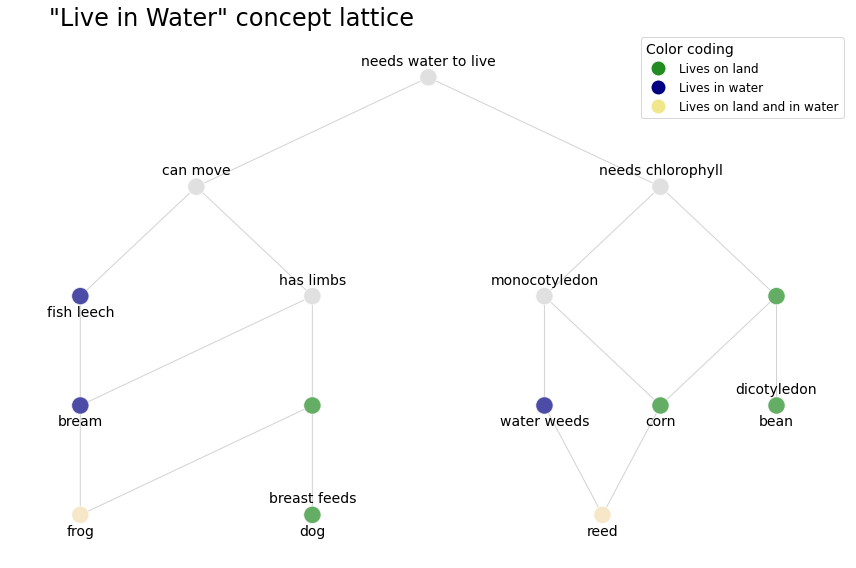

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

nodelist = [c_i for c_i, c in enumerate(L_nolives) if c != L_nolives.bottom_concept]
node_color = ['wheat' if 'lives in water' in L_nolives[c_i].intent and 'lives on land' in L_nolives[c_i].intent else
              'forestgreen' if 'lives on land' in L_nolives[c_i].intent else
              'navy' if 'lives in water' in L_nolives[c_i].intent else
              viz.node_color for c_i in nodelist]


viz.draw_concept_lattice(
    L_nolives, ax=ax,
    flg_node_indices=False,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=nodelist,
    node_color=node_color,
    node_alpha=0.7,
    node_label_func=node_label_func
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='forestgreen', label='Lives on land', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='navy',        label='Lives in water', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='khaki',       label='Lives on land and in water', markersize=15),
]
leg = ax.legend(loc='upper right', handles=legend_elements, fontsize=12, title='Color coding', title_fontproperties={'size': '14'}, frameon=True, fancybox=True)
leg._legend_box.align = "left"

plt.title('"Live in Water" concept lattice', size=24, ha='left', x=0.05)
plt.tight_layout()
plt.savefig('imgs/live_in_water_lattice_color.png')
plt.show()

# Remove the nodes that have no new intent or extent

In [25]:
from copy import deepcopy

In [26]:
L_nolives2 = deepcopy(L_nolives)
for c_i, c in enumerate(L_nolives):
    if c == L_nolives2.bottom_concept:
        continue
    
    if len(node_label_func(c_i, L_nolives).strip()) == 0:
        L_nolives2.remove(c)
len(L), len(L_nolives), len(L_nolives2)

(19, 16, 14)

In [27]:
viz.mover.pos = {c_i2: viz.mover.pos[L_nolives.index(c)]  for c_i2, c in enumerate(L_nolives2)}

In [28]:
pos_fix = viz.mover.pos

In [29]:
viz.mover.pos = pos_fix

viz.mover.pos = {
    c_i: (x, pos_fix[5][1] if c_i == 12 else pos_fix[6][1] if c_i == 10 else y)
    for c_i, (x, y) in pos_fix.items()
}

viz.mover.jitter_node(8, viz.mover.pos[12][0]-viz.mover.pos[8][0])
viz.mover.jitter_node(11, (viz.mover.pos[7][0]+viz.mover.pos[8][0])/2  -viz.mover.pos[11][0])

viz.mover.swap_nodes(3, 4)
viz.mover.swap_nodes(6, 10)
viz.mover.jitter_node(9, viz.mover.pos[6][0] - viz.mover.pos[9][0])

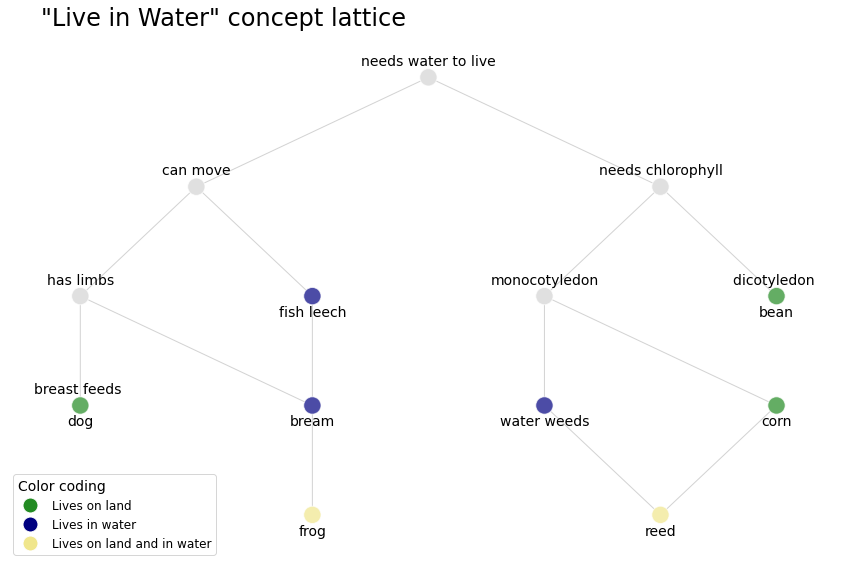

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

nodelist = [c_i for c_i, c in enumerate(L_nolives2) if c != L_nolives.bottom_concept]
node_color = ['khaki' if 'lives in water' in L_nolives2[c_i].intent and 'lives on land' in L_nolives2[c_i].intent else
              'forestgreen' if 'lives on land' in L_nolives2[c_i].intent else
              'navy' if 'lives in water' in L_nolives2[c_i].intent else
              viz.node_color for c_i in nodelist]

viz.draw_concept_lattice(
    L_nolives2, ax=ax,
    flg_node_indices=False,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=nodelist,
    node_color=node_color,
    node_alpha=0.7,
    node_label_func=node_label_func
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='forestgreen', label='Lives on land', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='navy',        label='Lives in water', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='khaki',       label='Lives on land and in water', markersize=15),
]
leg = ax.legend(loc='lower left', handles=legend_elements, fontsize=12, title='Color coding', title_fontproperties={'size': '14'}, frameon=True, fancybox=True)
leg._legend_box.align = "left"

plt.title('"Live in Water" concept lattice', size=24, ha='left', x=0.04)
plt.tight_layout()
plt.savefig('imgs/live_in_water_lattice_color_short.png')
plt.show()

# In conclusion

In [31]:
import seaborn as sns

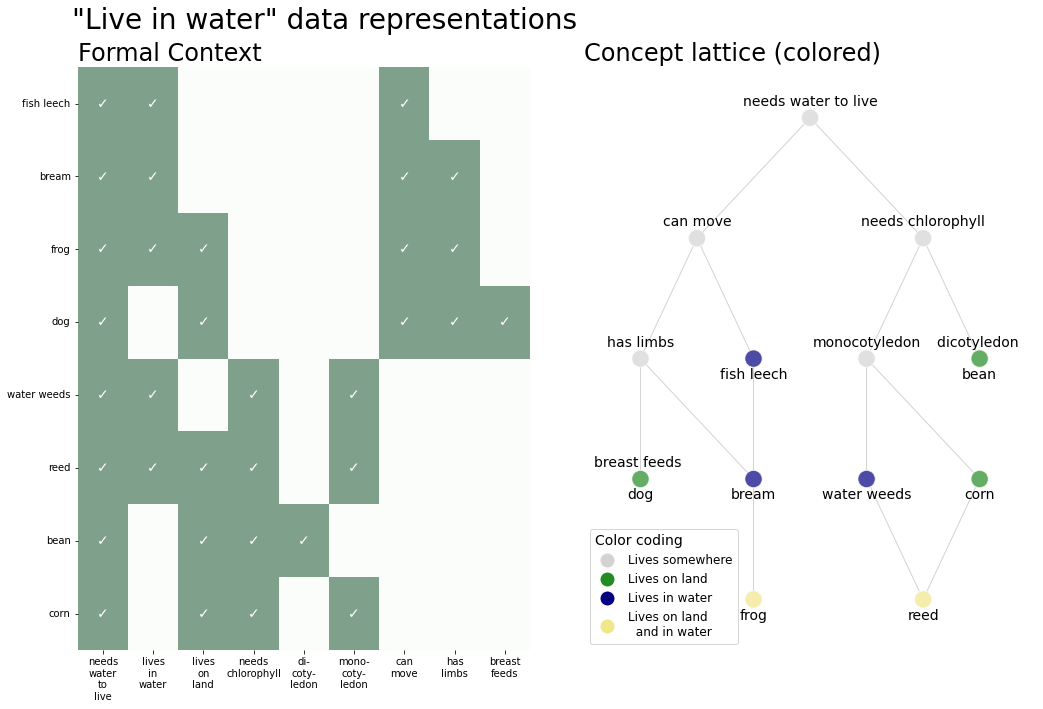

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10), )

ax = axs[0]
sns.heatmap(
    K.to_pandas(), cmap='Greens', alpha=0.5, ax=ax, cbar=False,
    annot=K.to_pandas().replace(True, '✓').replace(False, ''), fmt='', annot_kws={'fontsize': 14},
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels([
    lbl.get_text().replace(' ', '\n') if 'cotyledon' not in lbl.get_text()
    else lbl.get_text().replace('cotyledon', '-\ncoty-\nledon')
    for lbl in ax.get_xticklabels()
], rotation=0)
ax.set_title('Formal Context', size=24, ha='left', x=0.00)

ax = axs[1]

nodelist = [c_i for c_i, c in enumerate(L_nolives2) if c != L_nolives.bottom_concept]
node_color = ['khaki' if 'lives in water' in L_nolives2[c_i].intent and 'lives on land' in L_nolives2[c_i].intent else
              'forestgreen' if 'lives on land' in L_nolives2[c_i].intent else
              'navy' if 'lives in water' in L_nolives2[c_i].intent else
              viz.node_color for c_i in nodelist]

viz.draw_concept_lattice(
    L_nolives2, ax=ax,
    flg_node_indices=False,
    flg_new_intent_count_prefix=False,
    flg_new_extent_count_prefix=False,
    nodelist=nodelist,
    node_color=node_color,
    node_alpha=0.7,
    node_label_func=node_label_func,
    flg_axes=True,
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=viz.node_color, label='Lives somewhere', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='forestgreen', label='Lives on land', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='navy',        label='Lives in water', markersize=15),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='khaki',       label='Lives on land\n  and in water', markersize=15),
]
leg = ax.legend(
    loc='best',
    handles=legend_elements, fontsize=12,
    title='Color coding', title_fontproperties={'size': '14'},
    frameon=True, fancybox=True
)
leg._legend_box.align = "left"
ax.set_title('Concept lattice (colored)', size=24, ha='left', x=0.0)
ax.set_xlim(-0.8, 0.8)

plt.suptitle('"Live in water" data representations', size=28, ha='left', x=0.07)

plt.subplots_adjust(wspace=5, top=0.25)
plt.tight_layout()
plt.savefig('imgs/live_in_water_representation_comparison.png')
plt.show()